In [1]:
# Mount drive to access stored data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set the data path to where the datasets are stored
dataset_path = '/content/drive/My Drive/Difficult Words Data/DHH Children Data/'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Load data from the Excel file
data = pd.read_excel(dataset_path + 'complete_data.xlsx')

In [5]:
# Create and view a sample of the data, make sure it loaded correctly
sampled_data = data.sample(n=10)
print(sampled_data)

         words  no_of_char  syllable_count  Frequency_of_occurrence   \
108  COMPANION           1               1                         1   
493      STAGE           0               0                         1   
904      RINSE           0               0                         0   
640       BEEP           0               0                         0   
398    POVERTY           1               1                         1   
205     FORMAT           0               0                         1   
400   PRECEDED           1               0                         1   
772     HASSLE           0               0                         1   
884     PULPIT           0               0                         0   
384      PIECE           0               0                         1   

     presence_of_ch,sh,th,st,f  part_of_speech  pronounce_g_j  Pronounce_c_k  \
108                          0               1              0              1   
493                          1               1 

In [6]:
# Specify the features (X) and the target variable (y)
X = data.drop(columns=['overall_label', 'words'])  # Features (excluding 'overall_label' and 'words' columns)
y = data['overall_label']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter specifies the fraction of data to be used for testing (in this case, 20%).
# The 'random_state' parameter ensures reproducibility of the split.

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 7)
X_test shape: (200, 7)
y_train shape: (800,)
y_test shape: (200,)


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Creating the decision tree classifier model
classifier = DecisionTreeClassifier(random_state=42)

# Fitting the model
classifier.fit(X_train, y_train)

# Test the model
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.955


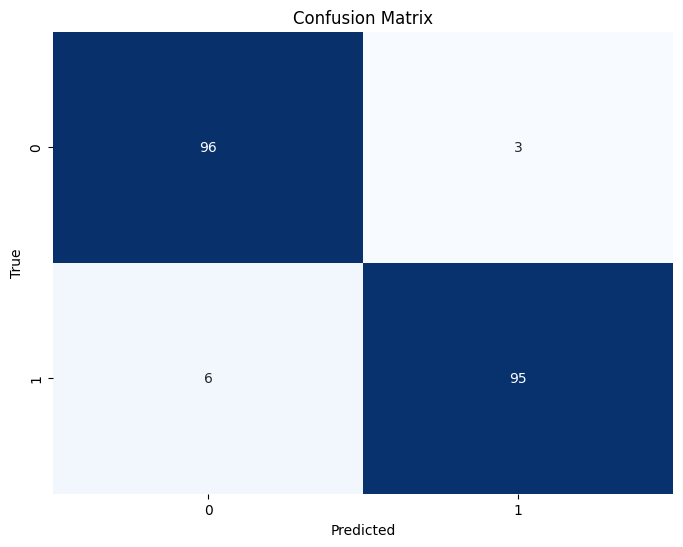

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a confusion matrix to better understand results
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

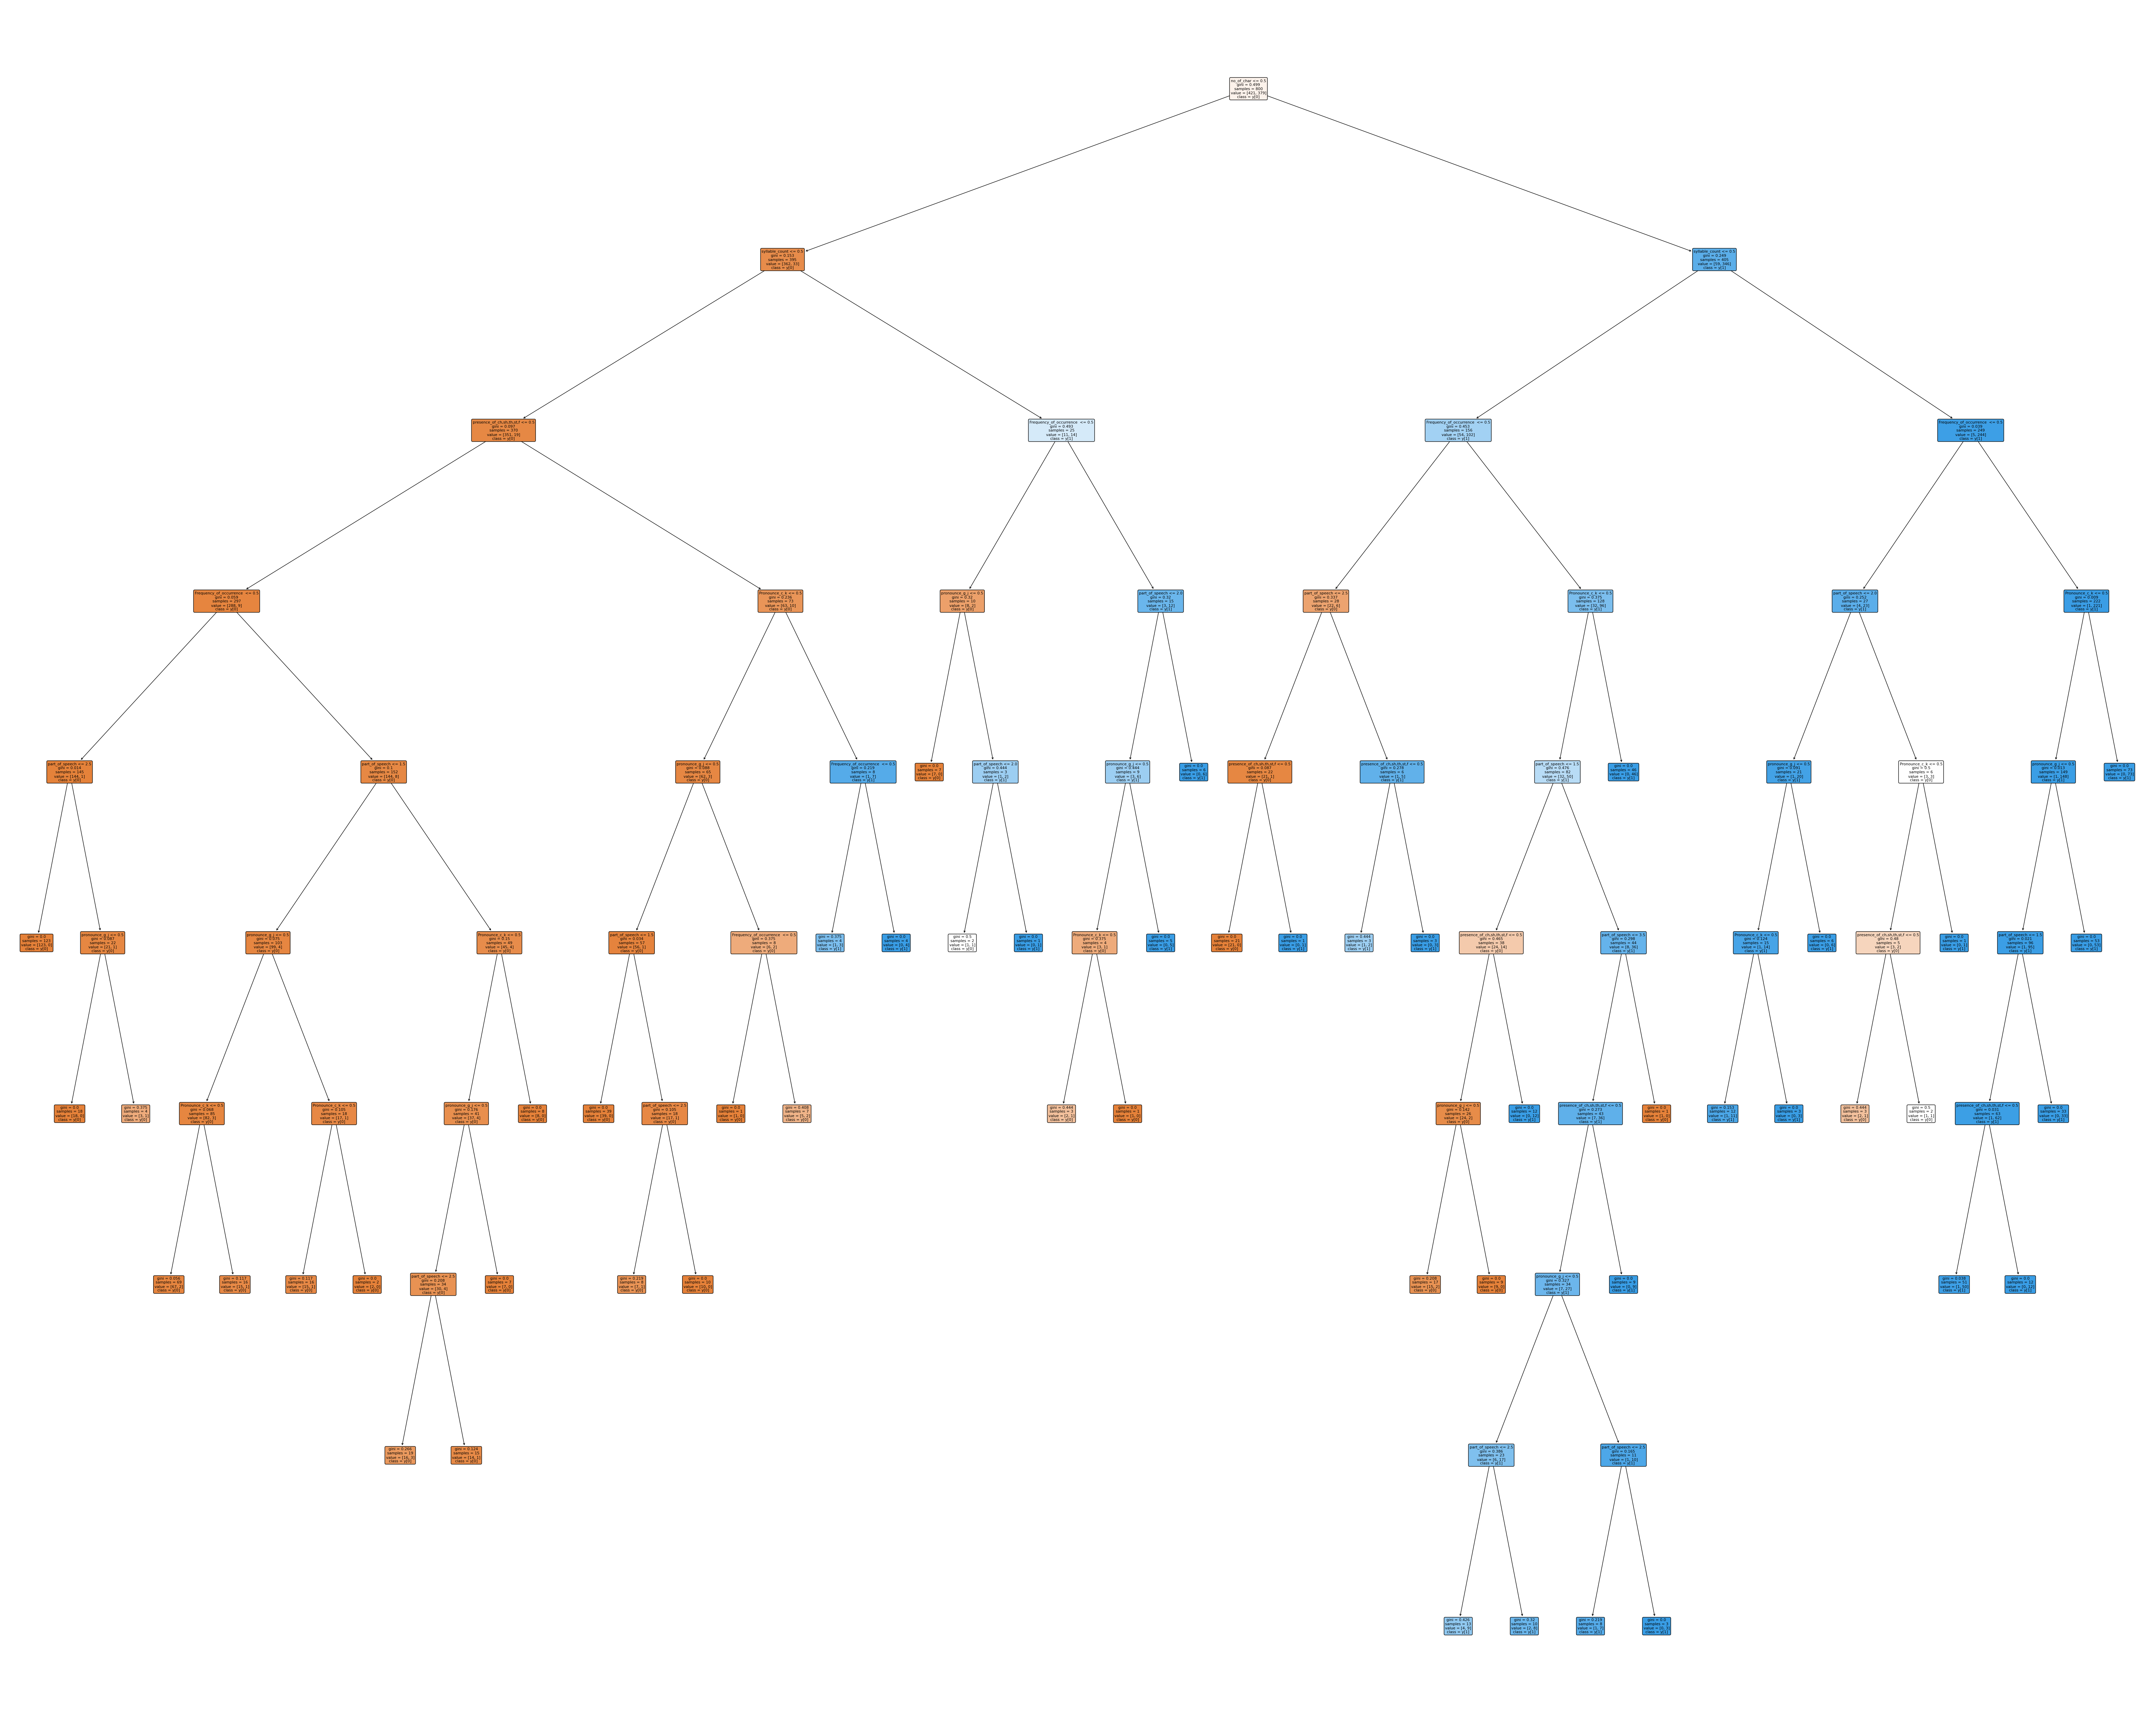

In [10]:
# Displaying the decision tree
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(80, 64))  # Adjust the figure size as needed
plot_tree(classifier, feature_names=X_train.columns, class_names=True, filled=True, rounded=True)
plt.show()

In [18]:
# Create a new version of the model with hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 4),
    'max_features': ['sqrt', 'log2', None]
}

# Create the model using a RandomizedSearchCV object
tuned_classifier = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42), # Random state for model reproducability
    param_distributions=param_dist, # Pass hyperparamaters to the object for tuning
    n_iter=100,  # How many random combinations will be tested
    cv=5, # How many times the data will be divided for cross validation
    random_state=42 # Random state for RSCV Object reproducability
)

# Fit the tuned model to the data
tuned_classifier.fit(X_train, y_train)

# Test the model
y_pred = tuned_classifier.predict(X_test)

In [12]:
# Test tuned model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96


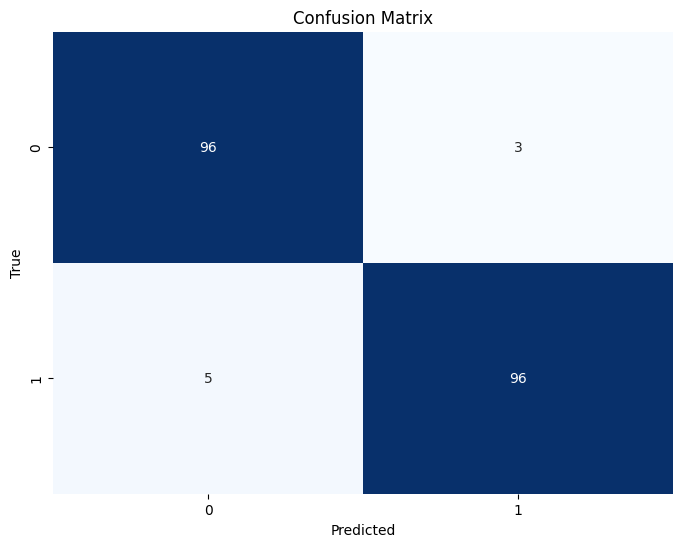

In [13]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

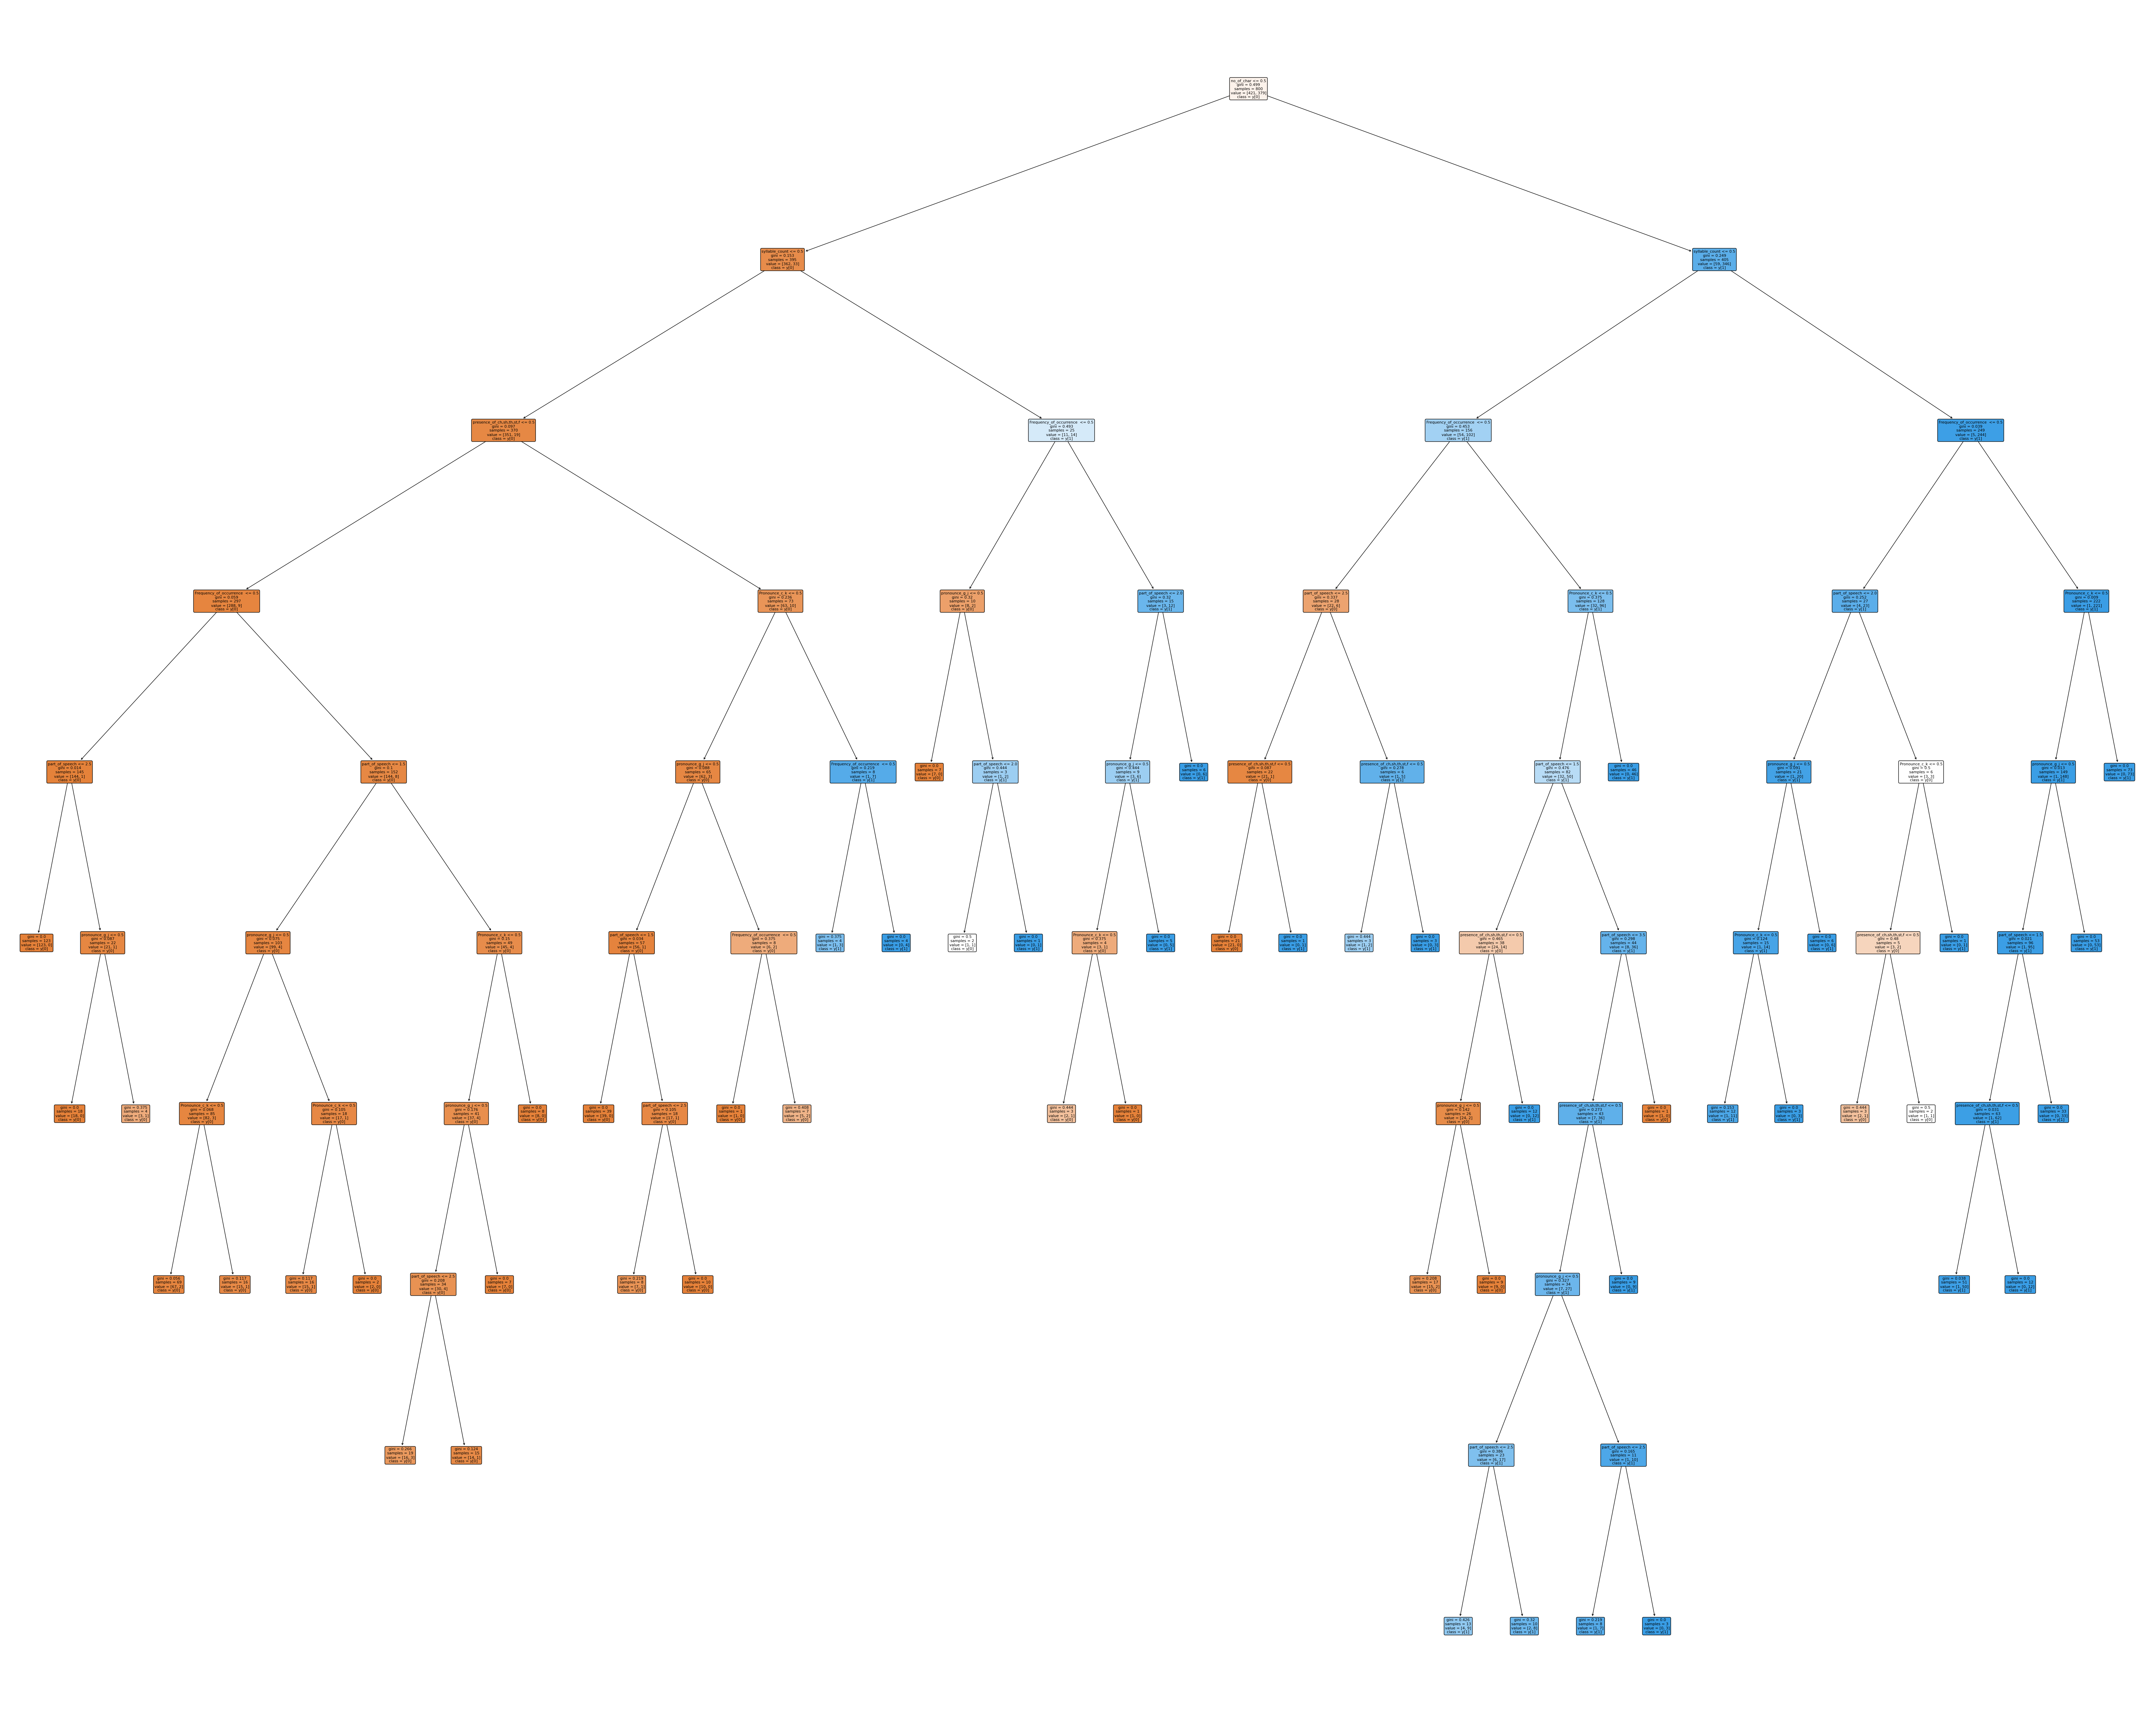

In [14]:
# Plot the tuned decision tree
plt.figure(figsize=(80, 64))  # Adjust the figure size as needed
plot_tree(classifier, feature_names=X_train.columns, class_names=True, filled=True, rounded=True)
plt.show()

In [15]:
import joblib

# Export the model for future use
joblib.dump(tuned_classifier, 'decisionTree_child_model.pkl')

['decisionTree_child_model.pkl']

In [16]:
# Find the importance of each feature in the decision tree,
# this can be useful for further modifications if needed

# Get best version of decision tree produced by our random object
best_decision_tree = tuned_classifier.best_estimator_

# Get feature importance scores from the best Decision Tree model
feature_importance = best_decision_tree.feature_importances_

# Create a list of (feature, importance) tuples
feature_importance_list = [(feature, importance) for feature, importance in zip(X_train.columns, feature_importance)]

# Sort the list in descending order of importance
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Display the feature importance list
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance}")

no_of_char: 0.5854188424758627
syllable_count: 0.13883109729006
part_of_speech: 0.0782149628327434
Pronounce_c_k: 0.07109902113627133
Frequency_of_occurrence : 0.057657717459262535
presence_of_ch,sh,th,st,f: 0.044843938357780846
pronounce_g_j: 0.02393442044801915


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_text

# Export the decision tree rules as text
tree_rules = export_text(best_decision_tree, feature_names=X.columns.tolist())
print(tree_rules)


|--- no_of_char <= 0.50
|   |--- syllable_count <= 0.50
|   |   |--- presence_of_ch,sh,th,st,f <= 0.50
|   |   |   |--- Frequency_of_occurrence  <= 0.50
|   |   |   |   |--- part_of_speech <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- part_of_speech >  2.50
|   |   |   |   |   |--- pronounce_g_j <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- pronounce_g_j >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Frequency_of_occurrence  >  0.50
|   |   |   |   |--- part_of_speech <= 1.50
|   |   |   |   |   |--- pronounce_g_j <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- pronounce_g_j >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- part_of_speech >  1.50
|   |   |   |   |   |--- Pronounce_c_k <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Pronounce_c_k >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- presence_of_ch,sh,th,st,f >  0.50
|   |   |   |--- Pronounce_c_k